# Assignment 3
This assignment covers material on fitting data and solving ODEs. The assignment is due on by 7pm on Friday the 6th of March.

The breakdown of the marks is as follows:

Q0: [1 mark]  
Q1: [7 marks]  
Q2: [5 marks]  
Q3: [5 marks]  
Q4: [5 marks]  
Q5: [7 marks]  

# Question 0

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub

In [24]:
#18441594 - Miruna Pericica

import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

## Question 1: Linear least-square fitting
This questions asks you to write a function to find the best linear fit to a dataset and then apply that function to a few data sets. As always when testing a new piece of code, you should first test the code on a small data set for which you know the result. The other advantage of testing with a small dataset is that you can manually check each step of the calculation if you need to debug the code.

The normal equations for linear least-squares fitting are given by:  
  
$$
  \begin{align*}
    m \sum x_i^2 + c \sum x_i &= \sum x_i y_i \\
    m \sum x_i + cn &= \sum y_i
  \end{align*}
$$
  
Write these simultaneous equations in matrix for $A.x = b$, where $A$ is a $2\times2$ matrix and $x=\{m,c\}$ and $b$ are column vectors. Note that for a $2\times2$ matrix 
$$
A = \begin{pmatrix}
    a  & b \\
    c  & d 
\end{pmatrix}
$$
the inverse is given by
$$
A^{-1} = \frac{1}{ad-bc}\begin{pmatrix}
    d  & -b \\
    -c  & a 
\end{pmatrix}
$$

### Q1a.

Write a function that takes in two arrays of data for the x and y values and returns the values of $m$ and $c$ from for the linear least squares fit. Call the function `LinearLeastSquares`. You might want to use the function `np.dot(A,b)` which will take the dot product of a matrix, $A$ and a vector, $b$.

In [182]:
def LinearLeastSquares(n, x =[],y=[]):
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    xy_sum = np.sum(x*y)
    x_squared_sum = np.sum(x*x)
    
    A = np.array([[x_squared_sum, x_sum], [x_sum, n]])
    b = np.array([[xy_sum],[y_sum]])
    #x = np.array([m,c])
    A_inv = la.inv(A)
    
    return np.dot(A_inv,b)

Test you function with the data we looked at in the lecture, given below:

In [183]:
testdata  = np.array([[20.5, 765], [32.7, 826], [51.0, 873], [73.2,942], [95.7,1032]])

x = testdata[:,0]
y = testdata[:,1]

LinearLeastSquares(5,x,y)

array([[  3.39487252],
       [702.17206279]])

You should get the result $m=3.394872522996579$ and $c=702.1720627939267$. Explicitly print these values out.

In [184]:
print("m=",LinearLeastSquares(5,x,y)[0], ", c=", LinearLeastSquares(5,x,y)[1])

m= [3.39487252] , c= [702.17206279]


### Q1b
Plot the data, using `plt.scatter(xi, yi)`, and the best fit curve over the full range of the data. Add a legend to the plot that labels the data and line with its equation.

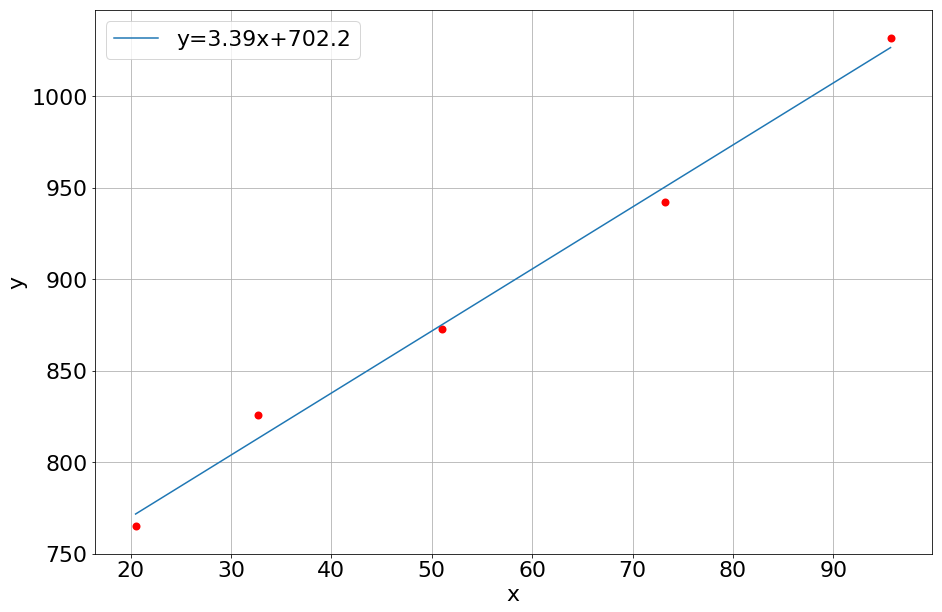

In [185]:
bestfit_y = 3.39*x+702.2

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,bestfit_y)
plt.legend(['y=3.39x+702.2'])
plt.scatter(x,y,color='red', linewidths='2')

### Q1c
Load the data in `FitData1.dat` and fit the data using your `LinearLeastSquares` function. Print out the value of $m$ and $c$ to 5 decimal places, and plot the data and the fit.

In [187]:
data1 = np.loadtxt('FitData1.dat')

x1 = data1[:,0]
y1 = data1[:,1]

m_c = np.round(LinearLeastSquares(5,x1,y1),5)
m = m_c[0]
c = m_c[1]

print("m=", m, ", c=", c)

m= [2.7847] , c= [2.62832]


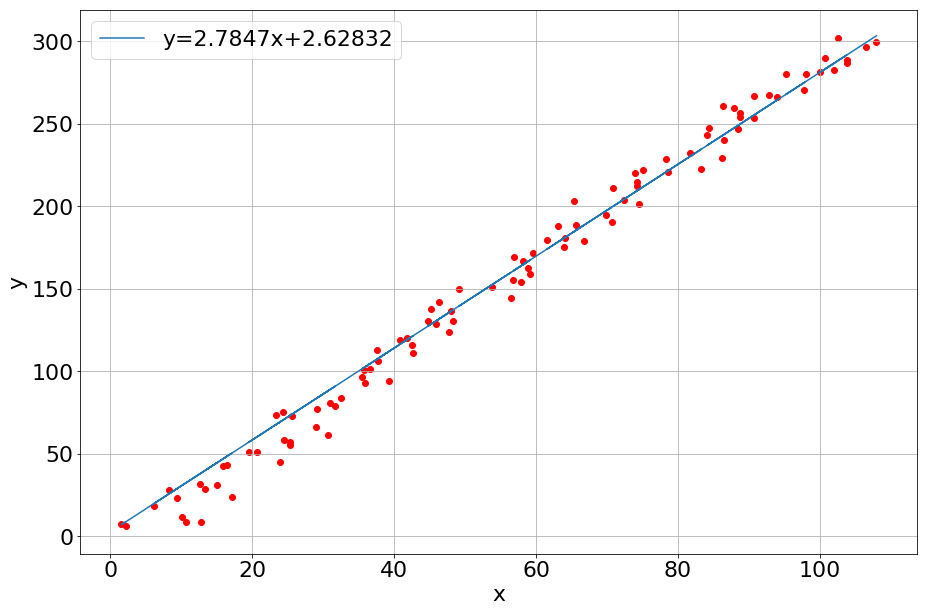

In [188]:
bestfit_y1 = 2.7847*x1+2.62832
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x1, bestfit_y1)
plt.scatter(x1,y1,color='red', linewidths='1')
plt.legend(['y=2.7847x+2.62832'])

### Q1d
Load the data in `FitData2.dat`. Determine whether this data is (approximately) power law or exponential. Depending on the answer, fit either the log or log-log of the data using your `LinearLeastSquares` function. Print the values of $m$ and $c$, and plot the (log or log-log of the) data and the fit. State explicitly what the approximate behaviour of the data is.

In [218]:
data2 = np.loadtxt('FitData2.dat')

x2 = data2[:,0]
y2 = data2[:,1]

In [216]:
# The data is a power law, we use a log-log plot

print('m=',LinearLeastSquares(5, np.log(x2), np.log(y2))[0])
print('c=',LinearLeastSquares(5, np.log(x2), np.log(y2))[1])

m= [-2.99531613]
c= [-0.00393917]


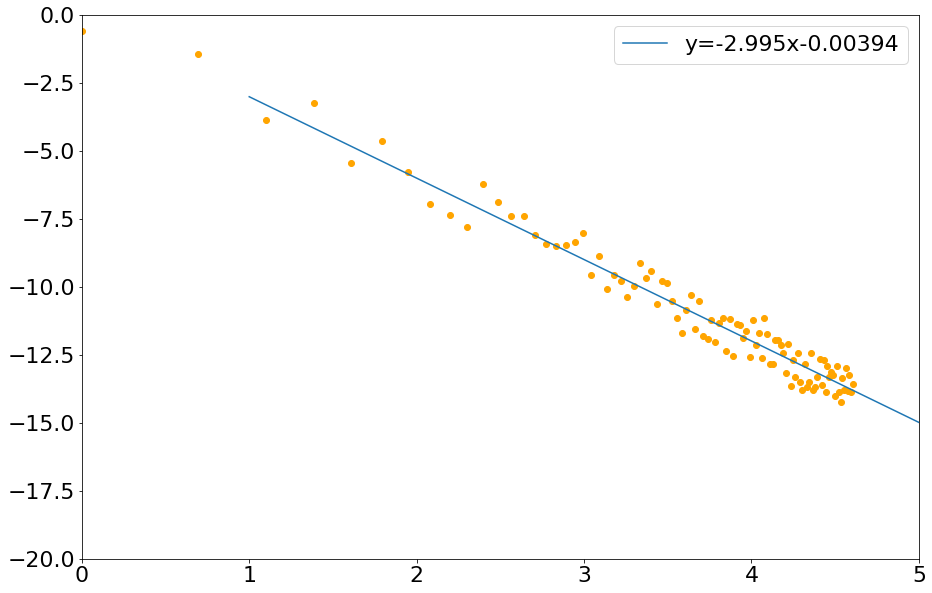

In [232]:
bestfit_y2 = -2.99531613*x2 -0.00393917
plt.scatter(np.log(x2),np.log(y2), color = 'orange')
plt.plot(x2,bestfit_y2)
plt.xlim(0,5)
plt.ylim(-20,0)
plt.legend(labels =['y=-2.995x-0.00394'])

# The data on the log-log plot behaves linearly confirming that data2 is a power law

Commit and push your code to GitHub

## Question 2: second-order ODEs

Use the below second-order version of the (fixed-step) RK2 function for this question.

In [168]:
def RK2(f, dx, x0, y0, imax):
    output = np.empty((imax, 3))
    i = 0
    xi = x0
    yi = y0
    while(i < imax):
        k1 = dx*f(xi, yi)
        k2 = dx*f(xi + dx, yi + k1)
        yi = yi + 0.5*(k1 + k2)
        xi += dx
        output[i, 0] = xi
        output[i, 1] = yi[0]
        output[i, 2] = yi[1]
        i += 1
    return output

### Q2a

Write the follow ODEs in first-order form and then solve them using the `RK2` function. Plot the numerical and analytic solution on the same plot (with a grid, labelling the axes and a legend).

$$
 y''(x) - y'(x) +\frac{1}{4} y(x) = -\sin(x)
$$
with $y(0) = 0, y'(0) = 73/100$. Find the numerical solution between $x=0$ and $x=9$.

This has the analytic solution:

$$
y(x) = \frac{1}{100} \left(-7 e^{x/2} x+64 e^{x/2}+48 \sin (x)-64 \cos (x)\right)
$$

For the numerical solution, start with a step size of $\Delta x = 0.1$. You may need to adjust this to get the numerical solution to agree with the analytic solution.

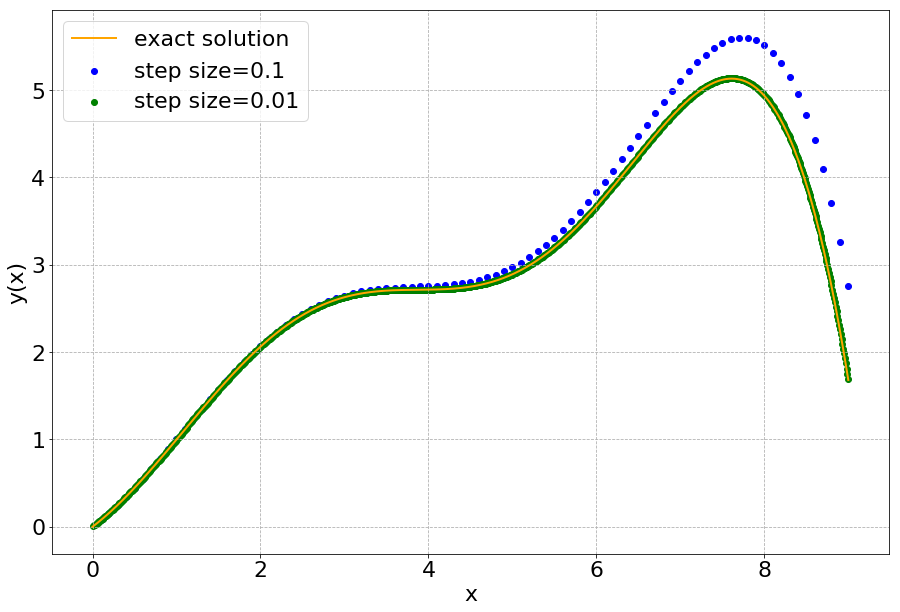

In [167]:
def FirstOrder(x,y):
    return np.array([y[1],(-y[0]/4+ y[1] -np.sin(x))])

def yexact(x):
    return((1/100))*(-7*np.exp(x/2)*x + 64*np.exp(x/2) + 48*np.sin(x) - 64*np.cos(x))

largestep = RK2(FirstOrder, 0.1, 0,[0, 73/100], 90)
smallstep = RK2(FirstOrder, 0.01, 0, [0, 73/100], 900)

x = np.linspace(0, 9, 9000)

#plt.rcParams["figure.figsize"] = (15,10)
plt.plot(x, yexact(x), color = 'orange', label='exact solution', linewidth = 2)
plt.grid(True, 'both', 'both', linestyle='--')
plt.scatter(largestep[:,0], largestep[:,1], color = 'blue', label = 'step size=0.1')
plt.scatter(smallstep[:,0], smallstep[:,1], color = 'green', label = 'step size=0.01')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend(loc='upper left')
plt.show()

How small do you have to make the step size for the numerical solution to agree well with the analytic solution? What does this suggest about the equation?

In [11]:
# The step size is 0.01 for the numerical solution to agree with the analytic solution, this tells us the equation is stiff

### Q2b

Write the follow ODEs in first-order form and then solve them using the `RK2` function. Plot the numerical solution (with a grid and labelling the axes). There is no analytic solution to compare against.

$$y''(x) + x y'(x) - \sin(x) y(x) = 0 $$

<function matplotlib.pyplot.show(*args, **kw)>

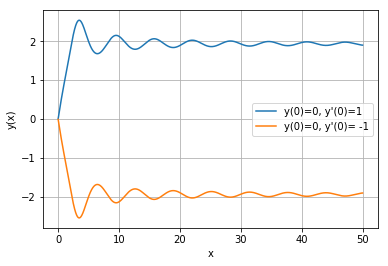

In [12]:
def FirstOrderSystem2(x,y):
    return np.array([y[1], (np.sin(x)*y[0]) -x*y[1]])
sol1 = RK2(FirstOrderSystem2, 0.01, 0, [0,1], 5000)
sol2 = RK2(FirstOrderSystem2, 0.01, 0, [0,-1], 5000)

plt.plot(sol1[:,0], sol1[:,1], label = "y(0)=0, y'(0)=1")
plt.plot(sol2[:,0], sol2[:,1], label = "y(0)=0, y'(0)= -1")
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True, 'both', 'both')
plt.legend()
plt.show

Commit and push your code to GitHub

## Question 3: chaos

(Q3a): Use SciPy's `solve_ivp` to solve the Lorenz system:

$$\begin{align}
\frac{dx}{dt} &= \sigma(y-x) \\
\frac{dy}{dt} &= x(\rho -z) - y   \\
\frac{dz}{dt} &= x y- \beta z
\end{align}$$

with $ \rho = 28$, $\sigma = 10$ and $\beta = 8/3$, and initial conditions $x(0) = 1, y(0) = 1, z(0) = 1$.

You'll need to `import` the `solve_ivp` function from `scipy`. Solve for the solution between $x=0$ and $x=30$ and pass the optional argument `t_eval=np.linspace(0,30,10000)` to `solve_ivp` to densely sample the result.

In [20]:
from scipy import integrate
from scipy.integrate import solve_ivp

x0, y0, z0 = 1,1,1

def lorenz(t, xyz):
    """The Lorenz Equations"""
    x,y,z = xyz
    sigma, beta, rho = 10, 8/3, 28
    
    xt = sigma*(y-x)
    yt = x*(rho-z)-y
    zt = x*y - beta*z
    
    return xt, yt, zt

t = np.linspace(0,30,10000)

solLorenz = solve_ivp(lorenz, [0,30], [1,1,1], t_eval = t)

Assign your solution to a variable called `solLorenz` and use the following code to make a 3D plot of the solution

Text(0.5, 0, 'z')

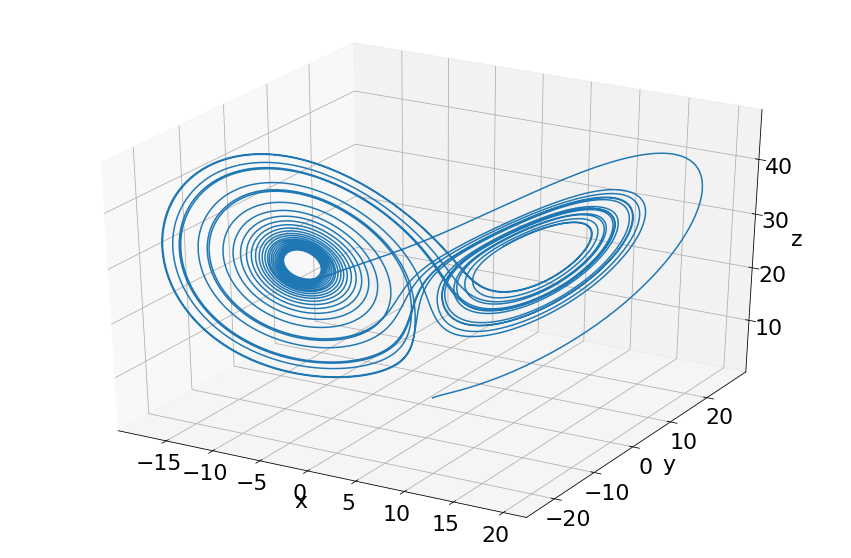

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(solLorenz.y[0], solLorenz.y[1], solLorenz.y[2]);

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

(Q3b): The Lorenz ODEs are a classic example of a system of ODEs which exhibit chaos, i.e., small changes in the initial parameters will result in large changes to the solution at late times. To see this, solve the Lorenz system again with initial parameters $x(0) = 1 + 10^{-5}, y(0) = 1, z(0) = 1$, and plot both this solution and the previous solution on a new 3D plot.

Text(0.5, 0, 'z')

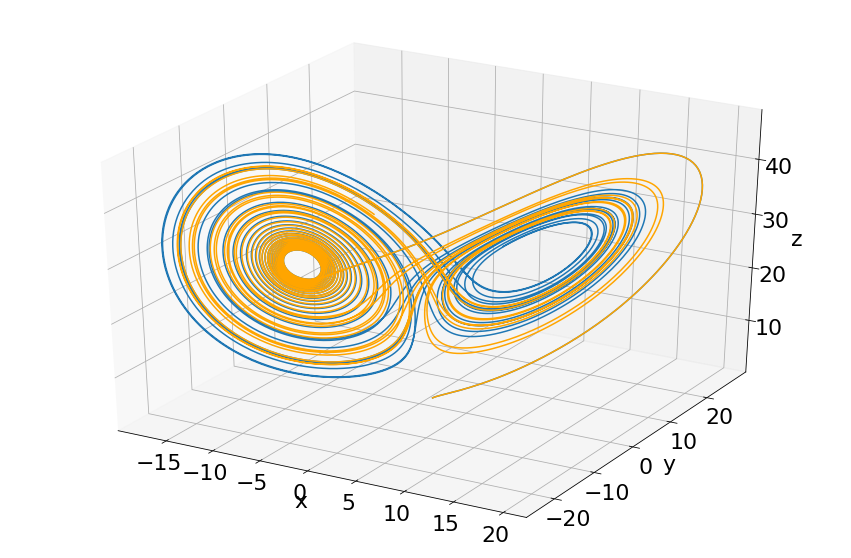

In [31]:
solLorenz2 = solve_ivp(lorenz, [0,30], [1+1*np.exp(-5),1,1], t_eval = t)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(solLorenz.y[0], solLorenz.y[1], solLorenz.y[2]);
ax.plot(solLorenz2.y[0], solLorenz2.y[1], solLorenz2.y[2], color = "orange");

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

You should see that initially the two curves are together but later one they start to diverge. The Lorenz system was original developed as a simple model of atmospheric convection and already this simple system, much like real weather, displays chaotic behaviour.

Commit and push your code to GitHub

## Question 4: equilbrium points

Using `solve_ivp` solve the non-linear first-order equation:

$$u'(x) = u(x)[1-u(x)]$$

Find and plot the solution between $x=0$ and $x=8$ for the following 10 initial values: $u(x) = \{0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.8\}$. Draw a grid on the plot and label your axes.

You should find the systems with initial values $u(0) = \{0,1\}$ do not evolve as the right-hand side equals zero in these cases. These two values are called *equilibrium points*. You should observe that systems with $u(0) > 0$ should tend to $u=1$ for large $x$ (and away from $u=1$). For this reason we say that $u=1$ is a stable equilbrium and $u=0$ is an unstable equilbrium.

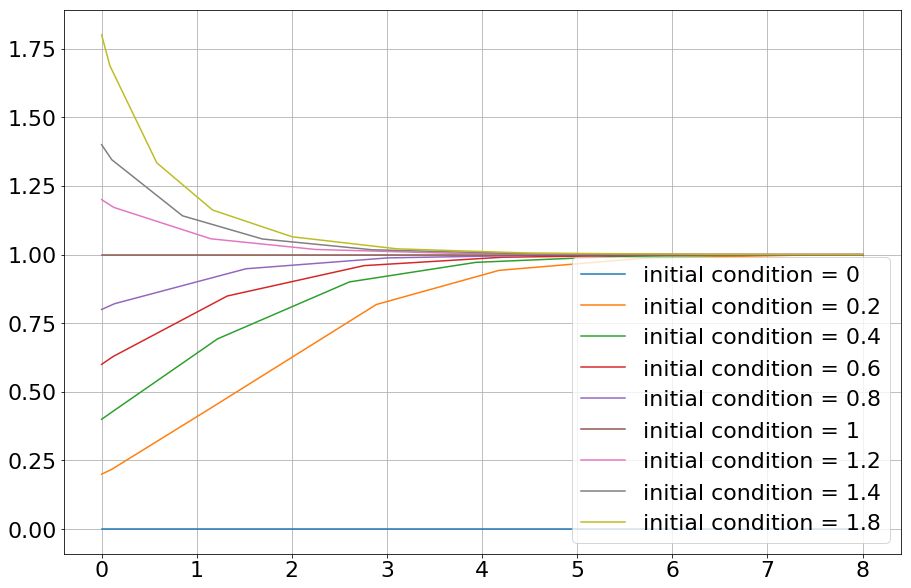

In [78]:
def FirstOrderSystem4(t,u):
    return u*(1-u)


sol1 = solve_ivp(FirstOrderSystem4, [0,8], [0])
sol2 = solve_ivp(FirstOrderSystem4, [0,8], [0.2])
sol3 = solve_ivp(FirstOrderSystem4, [0,8], [0.4])
sol4 = solve_ivp(FirstOrderSystem4, [0,8], [0.6])
sol5 = solve_ivp(FirstOrderSystem4, [0,8], [0.8])
sol6 = solve_ivp(FirstOrderSystem4, [0,8], [1])
sol7 = solve_ivp(FirstOrderSystem4, [0,8], [1.2])
sol8 = solve_ivp(FirstOrderSystem4, [0,8], [1.4])
sol9 = solve_ivp(FirstOrderSystem4, [0,8], [1.8])

plt.grid(True)
plt.plot(sol1.t, sol1.y[0], label='initial condition = 0')
plt.plot(sol2.t, sol2.y[0], label='initial condition = 0.2')
plt.plot(sol3.t, sol3.y[0], label='initial condition = 0.4')
plt.plot(sol4.t, sol4.y[0], label='initial condition = 0.6')
plt.plot(sol5.t, sol5.y[0], label='initial condition = 0.8')
plt.plot(sol6.t, sol6.y[0], label='initial condition = 1')
plt.plot(sol7.t, sol7.y[0], label='initial condition = 1.2')
plt.plot(sol8.t, sol8.y[0], label='initial condition = 1.4')
plt.plot(sol9.t, sol9.y[0], label='initial condition = 1.8')

plt.legend()

Commit and push your code to GitHub

## Question 5: implicit methods

Write a function to solve the following first-order ODE using the backwards Euler method:

$$
y'(x) = -y(x) + x
$$
with $y(0) = 1$

This has the analytic solution
$$
 y(x) = -1 + 2e^{-x} + x
$$

Plot the numerical and analytics solutions. Show a grid, label your axes and show a legend.

In [118]:
def yExact(x):
    return -1 + 2*np.exp(-x) + x

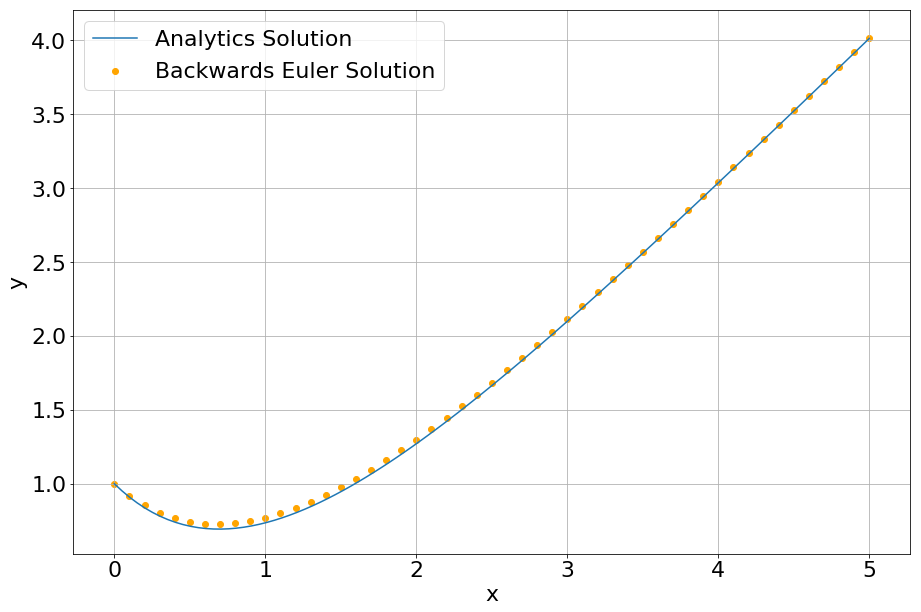

In [166]:
def BackwardsEuler(dx, x0, y0, imax, plotSteps=False):
    
    xi = x0
    yi = y0
    i=0
    
    steps = np.zeros((imax+1,2))
    steps[0,0] = x0
    steps[0,1] = y0
    
    while i < imax:
        yi = (yi + dx*(xi+dx))/(1+dx)
        xi += dx
        i += 1
        
        steps[i,0] = xi
        steps[i,1] = yi
        
    if(plotSteps):
        plt.scatter(steps[:,0], steps[:,1], color = 'orange')
        
    return [xi,yi]

x = np.linspace(0,5,100)
y = yExact(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
BackwardsEuler(0.1, 0, 1, 50,  True)
plt.legend(labels=['Analytics Solution', 'Backwards Euler Solution'], loc='best')

Commit and push your code to GitHub

To hand in the assignment: **Zip/compress the directory containing all your assignments and upload it to BrightSpace**